---
# CVL - Get started
This is a Jupyter Notebook to get you started on a typical CVL workflow.

---
# Import libraries
This is how to import libraries (also called packages) which are required later in the code.

In [1]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


---
# Create a map
Below an example of how to create a simple map using the cartopy package.

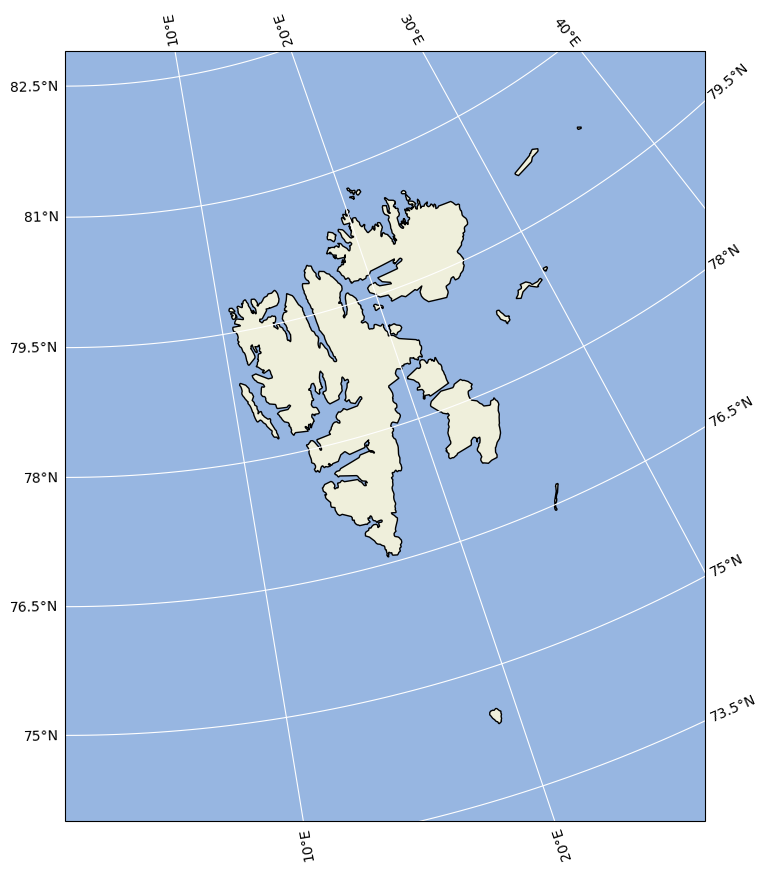

In [2]:
# set up a projection
myprojection = ccrs.Stereographic(central_longitude=0,central_latitude=60.)

# create a figure handle
fig = plt.figure(figsize=(10,10))

# create an axes handle with the previously specified projection
ax = plt.axes(projection=myprojection)

# customise map and add features
ax.set_extent([0,28,74,82])
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(color='white',draw_labels=True, y_inline=False)
ax.coastlines()

---
# Read in data

## A) Working with data products remote (supporting OPEnDAP)
NetCDF data for instance can be imported directly and we can read either the entire dataset or a subset of it. It is possible to filter by spatial and temporal dimensions.

In [3]:
# specify dataset url (e.g. Svalbard weather station)
data_url = 'https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99840.nc'

# read dataset
dst = xr.load_dataset(data_url)

Lets check out what is on the dataset

In [4]:
dst

<xarray.Dataset>
Dimensions:                        (time: 397152)
Coordinates:
  * time                           (time) datetime64[ns] 1975-08-01 ... 2019-...
Data variables:
    latitude                       float64 78.25
    longitude                      float64 15.5
    station_id                     |S64 b'SN99840'
    relative_humidity              (time) float32 0.78 0.88 0.79 ... 0.73 0.73
    surface_air_pressure_2m        (time) float32 1.011e+05 1.012e+05 ... 1e+05
    air_temperature_2m             (time) float32 278.0 276.6 ... 9.969e+36
    wind_from_direction_10m        (time) float32 230.0 260.0 ... 9.969e+36
    wind_speed_10m                 (time) float32 9.3 10.3 ... 9.969e+36
    air_pressure_at_sea_level      (time) float32 1.014e+05 ... 1.004e+05
    air_pressure_at_sea_level_qnh  (time) float32 9.969e+36 ... 1.003e+03
Attributes: (12/31)
    station_name:                    SVALBARD LUFTHAVN
    wigos_identifier:                0-20000-0-01008
    wmo_identifier:                  01008
    date_created:                    2019-09-03T09:57:42.519877+00:00
    Conventions:                     ACDD-1.3,CF-1.6
    title:                           Observations from station SVALBARD LUFTH...
    ...                              ...
    time_coverage_start:             1975-08-01T00:00:00
    time_coverage_end:               2019-09-03T09:00:00
    featureType:                     timeSeries
    DODS.strlen:                     7
    DODS.dimName:                    station_id
    DODS_EXTRA.Unlimited_Dimension:  time

We want to extract air temperature and take only a subset of the dataset

In [5]:
# data subset after 1979
tmp = dst['air_temperature_2m'].where(dst['time.year']>=1979,drop=True)

# filter data
air_temperature_2m = tmp.where(tmp<300)

Create a figure and plot the extracted data

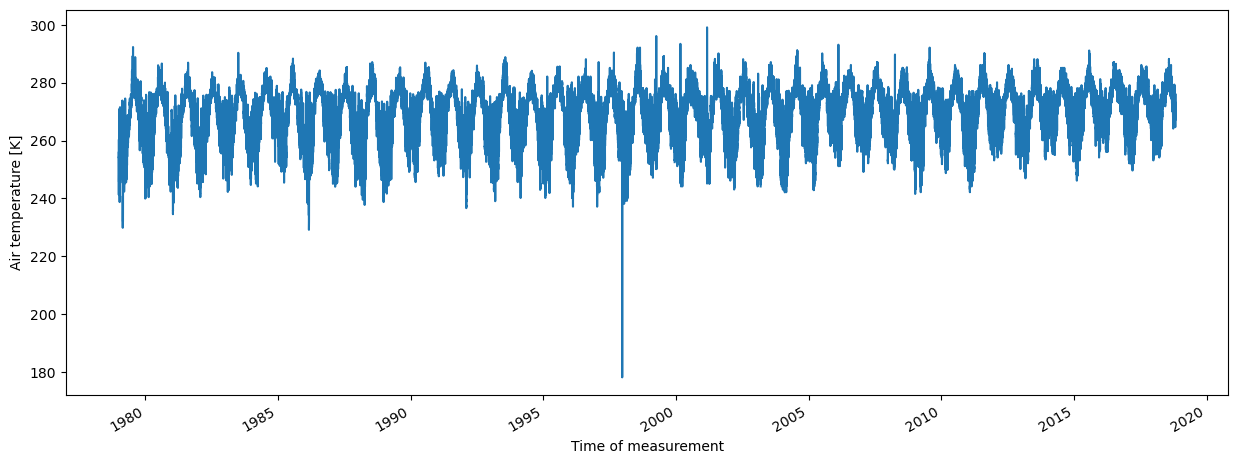

In [6]:
fig = plt.figure(figsize=(15,5))
air_temperature_2m.plot.line(x='time')

## B) Working with data products locally (not supporting OPEnDAP)
In case data can not be accessed using the OPEnDAP protocol, a local copy of the dataset is required.

In [7]:
import requests
import tempfile

Instead of creating a permament copy of a file it is possible to load it only temporary, extract what is needed and afterwards free disk space again.

In [8]:
# url to data file
data_url = 'https://api.npolar.no/dataset/5f53146f-0489-4400-a94c-59a6d565bf32/_file/atw12_CTD.nc'

# create temporary directory
with tempfile.TemporaryDirectory() as tmpdirname:
    print('created temporary directory', tmpdirname)
    
    # create a request link to the file
    r = requests.get(data_url, allow_redirects=True)
    
    # open a NetCDF file and write the linked file into it
    open(tmpdirname + '/out.nc', 'wb').write(r.content)
    
    # load the dataset on to a variable
    # it will be available after the temporary directory has been deleted agian
    dst = xr.load_dataset(tmpdirname + '/out.nc')

created temporary directory /tmp/tmpmyky4_0v


From this point the steps are similar to example **A)** and you can extract a subset of the data and plot it into a figure

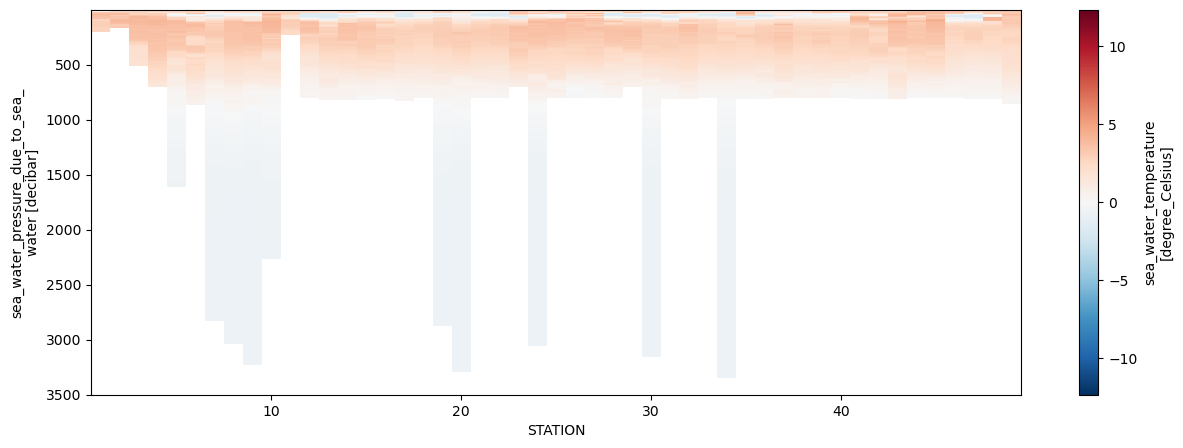

In [9]:
fig = plt.figure(figsize=(15,5))
dst['TEMP'].plot(x='STATION',y='PRES')
plt.gca().invert_yaxis()